# Pymaceuticals

#### Analysis
From a given fake study of drug effects on cancer treatment, perform some data manipulation and analysis to visualize a comparison of the effects of 3 distict drugs and a placebo. 
- With a trial period of 45 days, the drup Capomulin showed overall positive results with tumor volume decrease, lower metastatic spread and mortality rate. 
- The drug with the least effects were Ketrapil and Infubinol, achieving similar results as the the effects observed with the Placebo.
- As expected the Placebo treatement showed the largest metastatic spread.
- The number of subjects over which the tests were performed is a small sample and might skew the overall observations.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
# Read data it into pandas dataframes
pathclinical = os.path.join('raw_data','clinicaltrial_data.csv')
pathmouse = os.path.join('raw_data','mouse_drug_data.csv')
clinical_df = pd.read_csv(pathclinical)
mouse_df = pd.read_csv(pathmouse)

In [3]:
# Combine clinical data with mouse data into one dataframe. include all rows
combined_df = pd.merge(mouse_df,clinical_df,on='Mouse ID',how='outer')

In [4]:
# Extract data for only the drugs under study 
filtered = combined_df.loc[((combined_df['Drug'] =='Capomulin') |
                  (combined_df['Drug'] =='Infubinol') |
                  (combined_df['Drug'] =='Ketapril')  |
                  (combined_df['Drug'] =='Placebo')), :]

studydrugs = ['Capomulin','Infubinol','Ketapril','Placebo']
markers = {'Capomulin':'o','Infubinol':'^','Ketapril':'s','Placebo':'*'}
colors = {'Capomulin':'red','Infubinol':'blue','Ketapril':'green','Placebo':'magenta'}
x_index = np.arange(0,50,5)

### Tumor response to treatment

In [5]:
tumor_response = pd.DataFrame(filtered.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean())
filtered_df = pd.DataFrame(tumor_response.unstack(level=0))

tumor_error = pd.DataFrame(filtered.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem())
filtered_err = pd.DataFrame(tumor_error.unstack(level=0))

fig, ax = plt.subplots(figsize=(15,7))
for d in studydrugs:
    plt.errorbar(x_index, 
                 filtered_df['Tumor Volume (mm3)'][d], 
                 filtered_err['Tumor Volume (mm3)'][d],
                 elinewidth=0.5, ls='dashed', lw=0.5, 
                 ecolor=colors[d],color=colors[d],label=d)
    plt.scatter(x_index,
                filtered_df['Tumor Volume (mm3)'][d],
                marker=markers[d],color=colors[d],label=d)

    

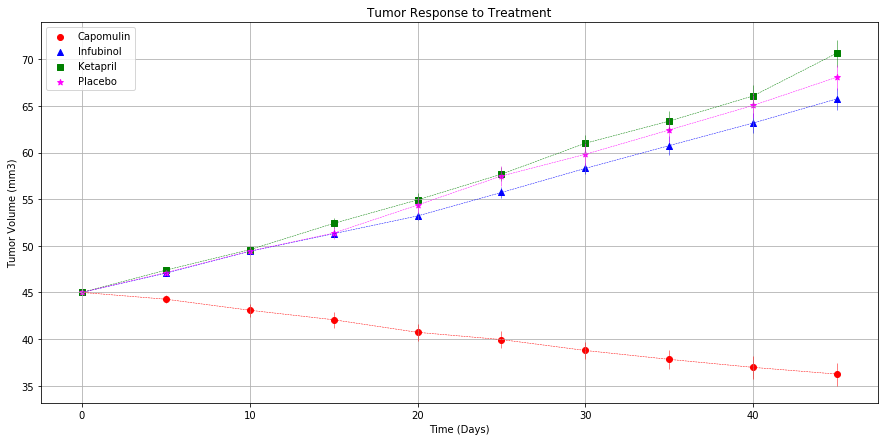

In [6]:
plt.title('Tumor Response to Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time (Days)')
plt.grid()
plt.legend(studydrugs)
plt.show()

### Metatstastic Response to Treatment

In [7]:
# average the metastatic response for all drugs during the treatment period
metastatic_response = pd.DataFrame(filtered.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean())
metastatic_df = pd.DataFrame(metastatic_response.unstack(level=0))

metastatic_error = pd.DataFrame(filtered.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem())
metastatic_err = pd.DataFrame(metastatic_error.unstack(level=0))

fig, ax = plt.subplots(figsize=(15,7))
for d in studydrugs:
    plt.errorbar(x_index, 
                 metastatic_df['Metastatic Sites'][d], 
                 metastatic_err['Metastatic Sites'][d],
                 elinewidth=0.5, ls='dashed', lw=0.5, 
                 ecolor=colors[d],color=colors[d],label=d)
    plt.scatter(x_index,
                metastatic_df['Metastatic Sites'][d],
                marker=markers[d],color=colors[d],label=d)

    

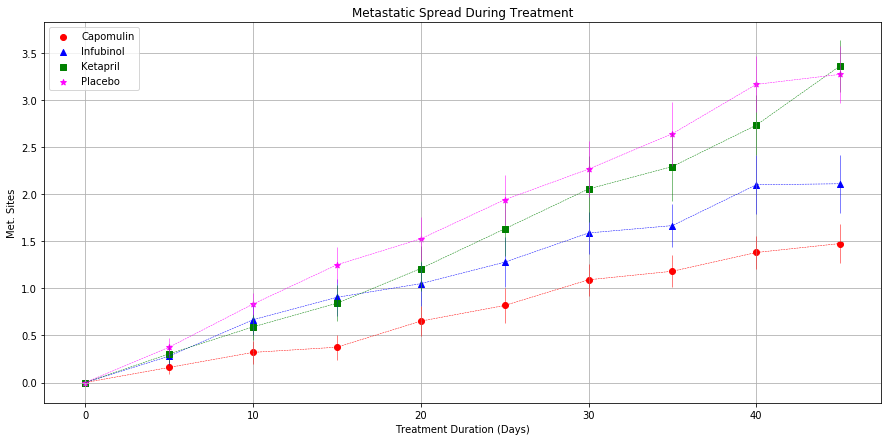

In [8]:
plt.ylabel('Met. Sites')
plt.xlabel('Treatment Duration (Days)')
plt.title('Metastatic Spread During Treatment')
plt.grid()
plt.legend(studydrugs)
plt.show()

### Survival rates

In [9]:
# count the mice 
mice_population = pd.DataFrame(filtered.groupby(['Drug','Timepoint'])['Mouse ID'].count())
mice_df = pd.DataFrame(mice_population.unstack(level=0))


# get percentage
mice_df = (mice_df/25)*100

fig, ax = plt.subplots(figsize=(15,7))
for d in studydrugs:
    plt.errorbar(x_index, 
                 mice_df['Mouse ID'][d], 
                 0,
                 elinewidth=0.25, ls='dashed', lw=0.25, 
                 ecolor=colors[d],color=colors[d],label=d)

    plt.scatter(x_index,
                mice_df['Mouse ID'][d],
                marker=markers[d],color=colors[d],label=d)


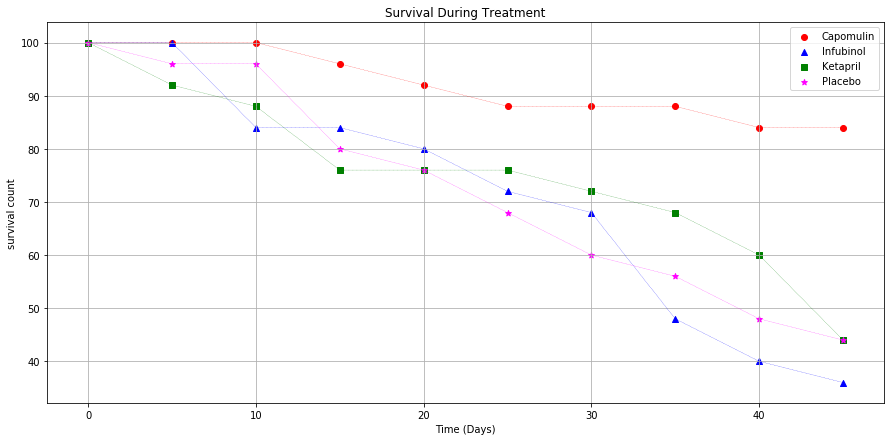

In [10]:
plt.ylabel('survival count')
plt.xlabel('Time (Days)')
plt.title('Survival During Treatment')
plt.grid()
plt.legend(studydrugs)
plt.show()

### Summary bar graph

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
Name: Tumor Volume (mm3), dtype: float64


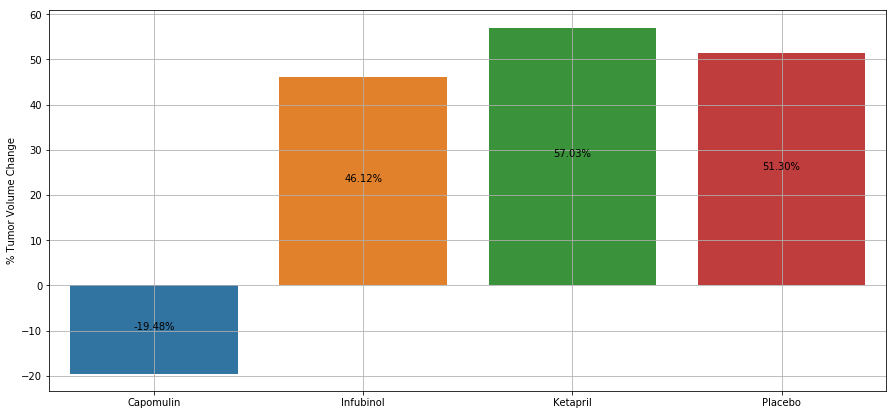

In [11]:
import seaborn as sns

# group by drugs and Timepoint 
f1 = filtered.loc[filtered['Timepoint']==0]
start = f1.groupby('Drug')['Tumor Volume (mm3)'].mean()
f2 = filtered.loc[filtered['Timepoint']==45]
end = f2.groupby('Drug')['Tumor Volume (mm3)'].mean()

change = ((end-start)/start)*100
print(change)
index = np.arange(0,4)

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(index,change)
plt.xticks(index, studydrugs)
plt.grid()
plt.ylabel('% Tumor Volume Change')
for a in index:
    plt.annotate(
            '{:,.2f}%'.format(change[a]),  # Use values formated as label
            (a, change[a]/2),              # Place label at center of the bar
            ha='center')                   # align to center

plt.show()